<a href="https://colab.research.google.com/github/BiancadeFrancisco/Regressao_Polinomial/blob/main/REGRESS%C3%83O_POLINOMIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Polinomial

Inicialmente vamos gerar dados não lineares baseado em um simples equação quadrática:

$$y = ax^{2} + bx + c$$

Além disso, adicionamos algum ruído.


# PREDIÇÃO SIMPLES, USANDO APENAS UMA VARIÁVEL X E Y.

In [ ]:
# CRIANDO BASE DE DADOS DE FORMA ALEATÓRIA

import numpy as np
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 * X + np.random.rand(m, 1)

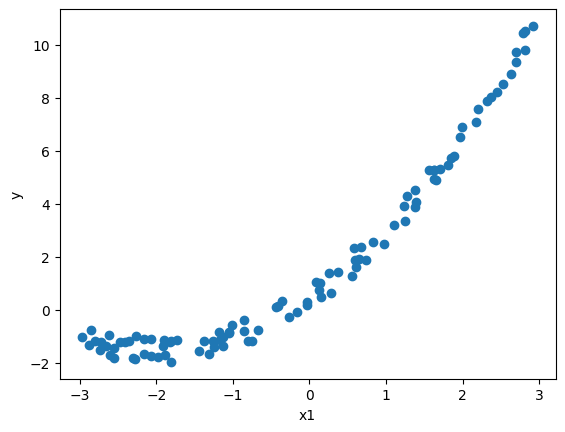

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y');

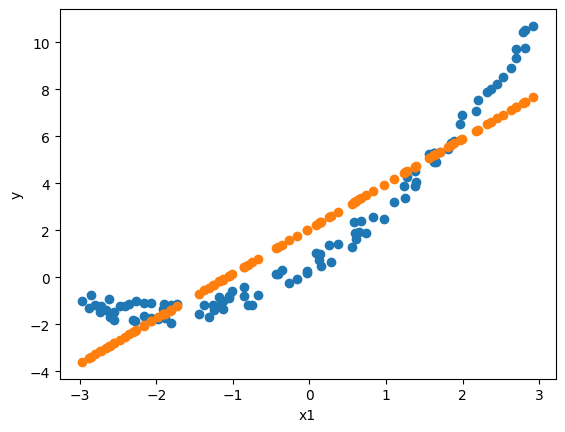

In [ ]:
# TESTA UMA LINHA LINEAR PARA VER COMO SE COMPORTA


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

previsoes = lr.predict(X)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, previsoes)
plt.xlabel('x1')
plt.ylabel('y');

Como podemos ver uma linha reta não irá acomodar corretamente esses dados. Então podemos utilizar a funcionalidade `PolynomialFeatures` para transformar nossos dados de treinamento elevando os valores ao quadrado (Polinômio de 2 grau).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# include_bias=False: para não ter viés

In [ ]:

lr_poly = LinearRegression()
lr_poly.fit(x_poly, y)


LinearRegression()

In [ ]:
print(lr_poly.intercept_)
print(lr_poly.coef_)

[0.49786712]
[[1.9943591  0.49967213]]


In [ ]:
pred_poly = lr_poly.predict(x_poly)

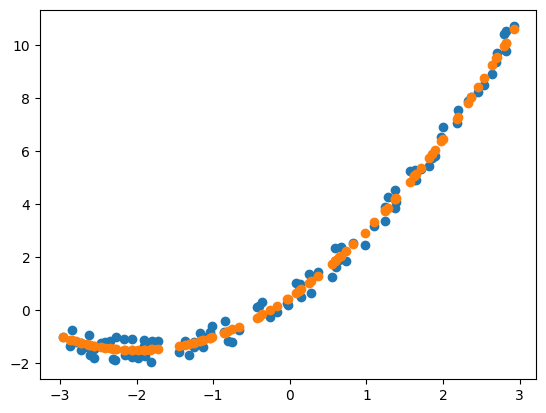

In [ ]:
plt.scatter(X, y)
plt.scatter(X, pred_poly)

# PREDIÇÃO COM VARIÁVEL MULTIPLA, USANDO MAIS DE UMA VARIÁVEL X (EXPLICATIVA) E Y.

In [ ]:
# CRIAR BASE DE DADOS ALEATÓRIOS:

import numpy as np
import pandas as pd

np.random.seed(42)

n = 100
x1 = 6 * np.random.rand(m, 1) - 3
x2 = 3.2 * np.random.rand(m, 1) - 1

y = 1.3 * x1 ** 2 + 0.5 * x1 * x2 + np.random.rand(m, 1)

df = pd.DataFrame ({"x1": x1.ravel(),
                    "x2": x2.ravel(),
                    "y": y.ravel()})

df.head()

,x1,x2,y
0,-0.752759,-0.899427,1.717198
1,2.704286,1.036513,10.992765
2,1.391964,0.005939,2.684594
3,0.591951,0.627426,1.539785
4,-2.063888,1.904213,4.178913


In [ ]:
# TREINAR O MODELO:

from sklearn.metrics import r2_score

x = df.drop("y", axis=1).copy()
y = df["y"].copy()

lr_reg = LinearRegression()
lr_reg.fit(x, y)

y_pred = lr_reg.predict(x)

r2_score(y, y_pred)

0.0040374853360972685

In [ ]:
# APLICAR O MÉTODO POLINOMIAL:

poly_feature = PolynomialFeatures(degree=2, include_bias=False)

x_poly = pd.DataFrame(poly_feature.fit_transform(x), columns=["x1", "x2", "x1_quadrado", "x1x2", "x2_quadrado"])

x_poly.head()

,x1,x2,x1_quadrado,x1x2,x2_quadrado
0,-0.752759,-0.899427,0.566647,0.677052,0.808968
1,2.704286,1.036513,7.313162,2.803028,1.074360
2,1.391964,0.005939,1.937563,0.008267,0.000035
3,0.591951,0.627426,0.350406,0.371406,0.393664
4,-2.063888,1.904213,4.259634,-3.930082,3.626026


In [ ]:
# TREINAR O MODELO LINEAR REGRESSION:

lr = LinearRegression()
lr.fit(x_poly, y)

LinearRegression()

In [ ]:
r2_score(y, lr.predict(x_poly))

0.9936124863410263